In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

### 3.1 Chi-square

In [1]:
from scipy.stats import chi2_contingency

In [63]:
variables = ["pclass", "survived", 'sex', 'sibsp', 'parch', 'embarked']

data = pd.read_csv("https://www.openml.org/data/get_csv/16826755/phpMYEKM1",
                   usecols = variables,
                   na_values="?")

In [64]:
data.head()

,pclass,survived,sex,sibsp,parch,embarked
0,1,1,female,0,0,S
1,1,1,male,1,2,S
2,1,0,female,1,2,S
3,1,0,male,1,2,S
4,1,0,female,1,2,S


In [65]:
data.dropna(subset = ["embarked"], inplace=True)
data.head()

,pclass,survived,sex,sibsp,parch,embarked
0,1,1,female,0,0,S
1,1,1,male,1,2,S
2,1,0,female,1,2,S
3,1,0,male,1,2,S
4,1,0,female,1,2,S


In [66]:
data.isna().sum()

pclass      0
survived    0
sex         0
sibsp       0
parch       0
embarked    0
dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis = 1),
    data['survived'],
    test_size = 0.3,
    random_state = 0
)

In [68]:
c = pd.crosstab(y_train, X_train["sex"])
c

sex,female,male
survived,,
0,89,483
1,230,112


In [69]:
chi2_contingency(c)

(249.44419858265127,
 3.432495124524887e-56,
 1,
 array([[199.63676149, 372.36323851],
        [119.36323851, 222.63676149]]))

In [76]:
chi_ls = []

for col in X_train.columns:
    c = pd.crosstab(y_train, X_train[col])
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)
    
chi_series = pd.Series(chi_ls, index = X_train.columns).sort_values(ascending=True)
chi_series

sex         3.432495e-56
pclass      5.105063e-25
embarked    3.815586e-07
dtype: float64

In [77]:
df = pd.DataFrame(chi_series).rename(columns = {0:"p_val"})
df

,p_val
sex,3.432495e-56
pclass,5.105063e-25
embarked,3.815586e-07


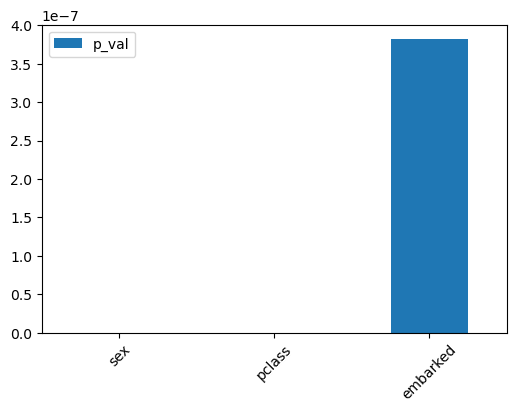

In [78]:
fig, ax = plt.subplots(figsize = (6, 4))

df.plot(kind = "bar",
        ax=ax)

ax.tick_params("x", labelrotation = 45)

In [81]:
### Retain Top 3 Features

selected = pd.Series(chi_ls, index = X_train.columns).sort_values(ascending=True)[0:3].index
selected


Index(['sex', 'pclass', 'embarked'], dtype='object')

In [83]:
X_train = X_train[selected]
y_train = X_test[selected]
X_train.head()

,sex,pclass,embarked
868,male,3,S
429,male,2,S
480,male,2,C
1308,male,3,S
455,male,2,S


### 3.2 ANOVA

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import (f_classif, SelectFdr, SelectKBest)

In [3]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
y = breast_cancer.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 0
)

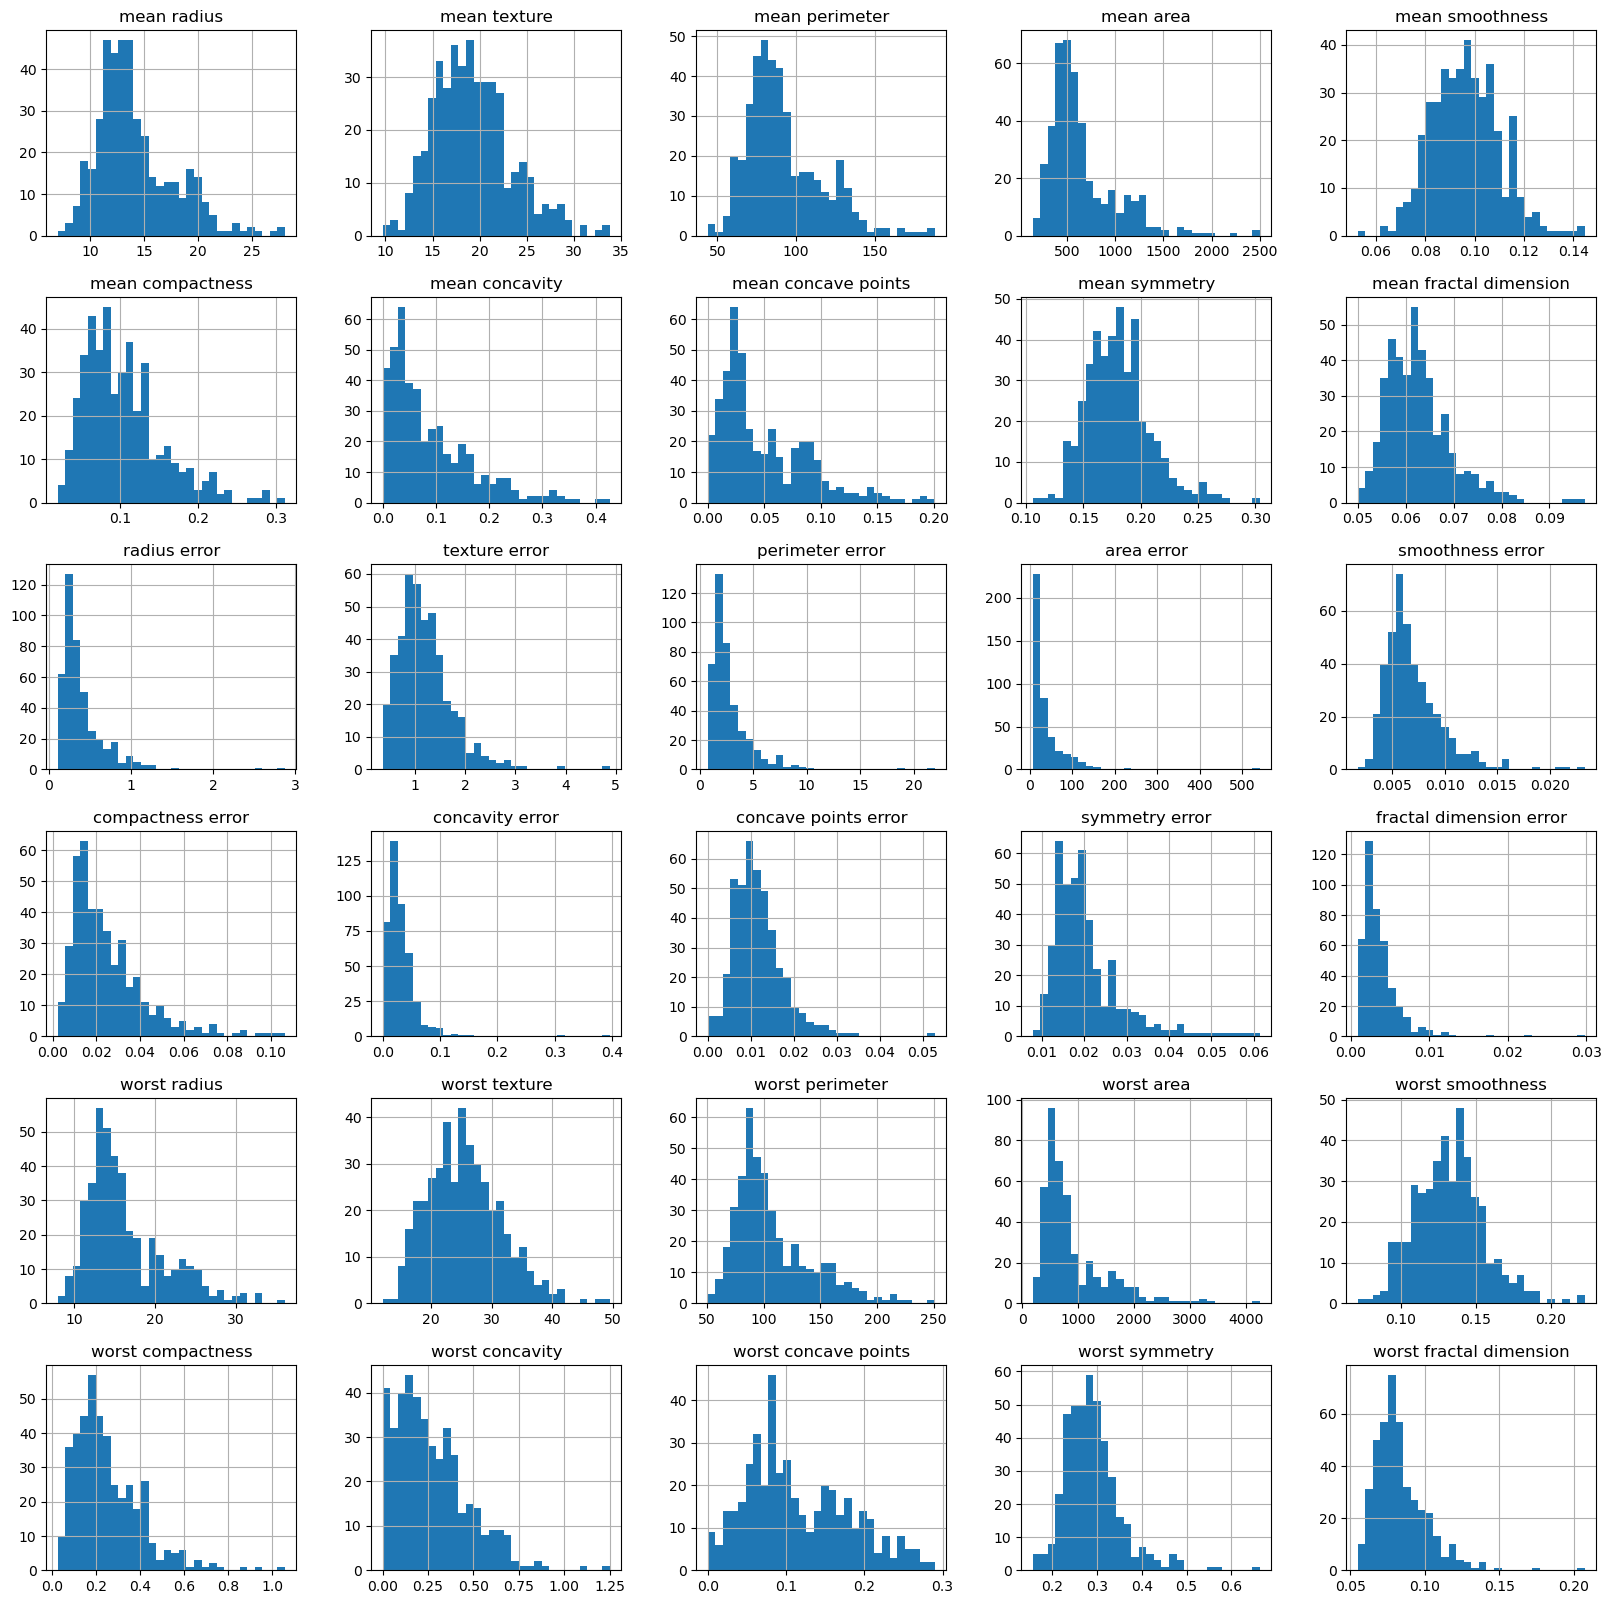

In [5]:
X_train.hist(bins = 30, figsize = (20,20))
plt.show()

In [7]:
univarite = f_classif(X_train, y_train)
univarite

(array([4.56888468e+02, 8.07899168e+01, 4.90890258e+02, 3.94647061e+02,
        6.91090732e+01, 2.51091933e+02, 3.77169033e+02, 6.40392388e+02,
        5.64534892e+01, 2.32061889e-01, 1.89198831e+02, 4.60132652e-01,
        1.77794821e+02, 1.61603286e+02, 3.44368683e+00, 3.19209297e+01,
        1.52804441e+01, 6.90719571e+01, 3.73129536e-01, 1.22007037e+00,
        6.11484676e+02, 1.04059005e+02, 6.34234486e+02, 4.60094540e+02,
        9.71806726e+01, 2.42990980e+02, 3.24298240e+02, 7.30475928e+02,
        9.36811856e+01, 4.94480861e+01]),
 array([2.55823842e-69, 8.37108067e-18, 8.19690935e-73, 1.48052645e-62,
        1.27734112e-15, 9.49913611e-45, 1.45377554e-60, 8.98762428e-87,
        3.44436651e-13, 6.30247708e-01, 7.43308506e-36, 4.97932018e-01,
        4.06310902e-34, 1.36320509e-31, 6.41875480e-02, 2.94961572e-08,
        1.07859166e-04, 1.29817853e-15, 5.41630631e-01, 2.69973265e-01,
        3.11012794e-84, 5.36444219e-22, 3.08095116e-86, 1.18230031e-69,
        8.87987480e-21

Text(0.5, 1.0, 'Anova')

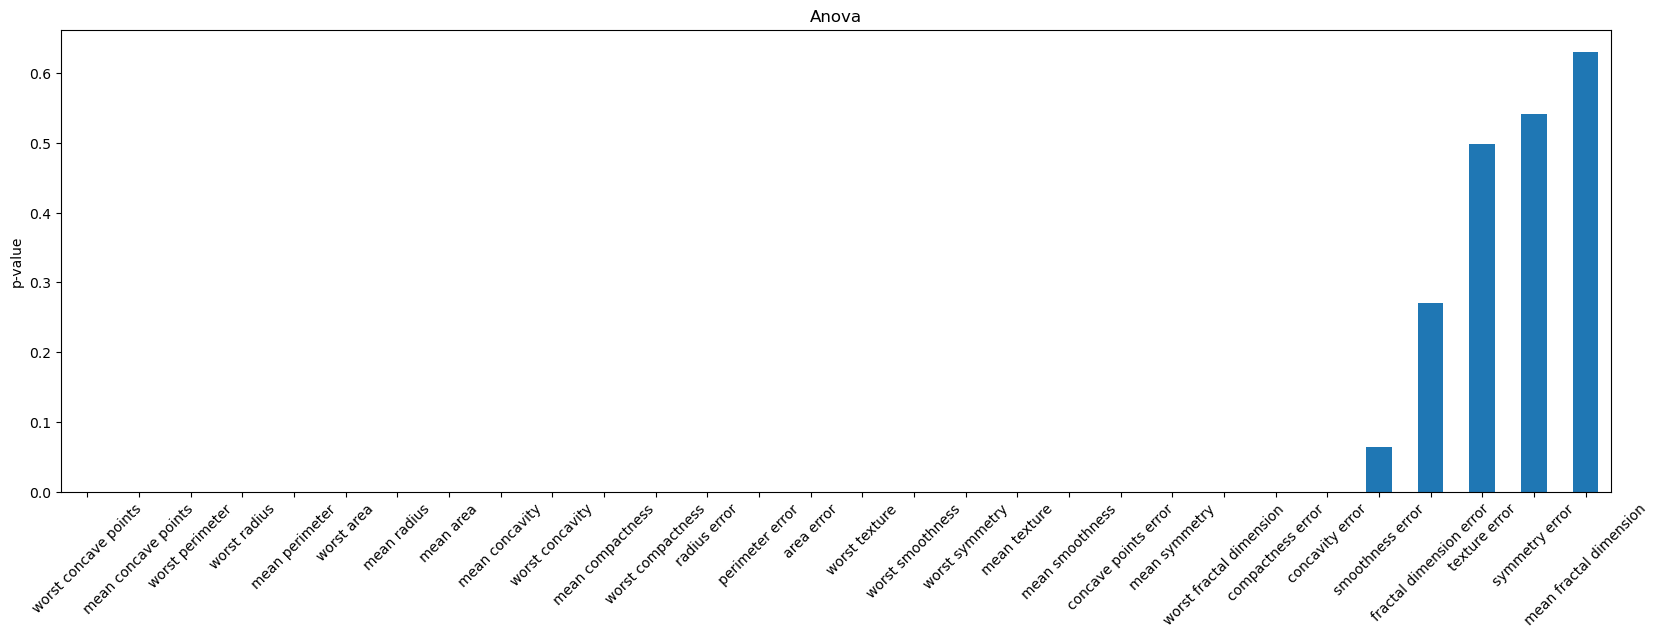

In [8]:
univarite = pd.Series(univarite[1])
univarite.index = X_train.columns
univarite.sort_values(ascending=True).plot.bar(figsize = (20, 6), rot = 45)
plt.ylabel("p-value")
plt.title("Anova")

In [11]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

Text(0, 0.5, 'Number of observations')

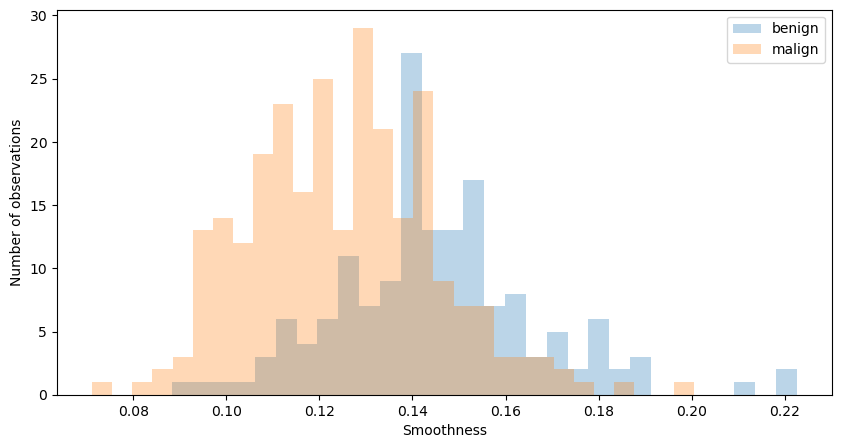

In [24]:
# Compare the histogram of features whose p-value < 0.05

sample1 = X_train.loc[y_train==0, "worst smoothness"]
sample2 = X_train.loc[y_train==1, "worst smoothness"]

fig, ax = plt.subplots(figsize = (10, 5))

ax.hist(sample1,
        bins = 30,
        label="benign",
        alpha = 0.3)
ax.hist(sample2,
        bins = 30,
        label="malign",
        alpha = 0.3)
ax.legend()

ax.set_xlabel("Smoothness")
ax.set_ylabel("Number of observations")


Text(0, 0.5, 'Number of observations')

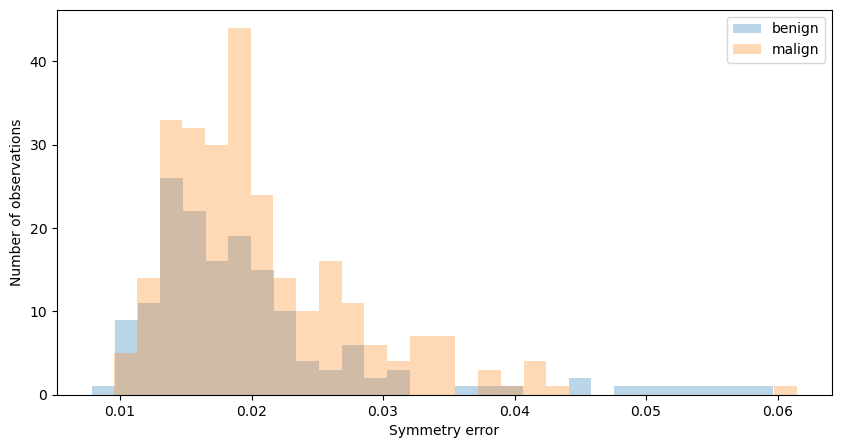

In [25]:
# Compare the histogram of features whose p-value > 0.05

sample1 = X_train.loc[y_train==0, "symmetry error"]
sample2 = X_train.loc[y_train==1, "symmetry error"]

fig, ax = plt.subplots(figsize = (10, 5))

ax.hist(sample1,
        bins = 30,
        label="benign",
        alpha = 0.3)
ax.hist(sample2,
        bins = 30,
        label="malign",
        alpha = 0.3)
ax.legend()

ax.set_xlabel("Symmetry error")
ax.set_ylabel("Number of observations")

In [26]:
sel = SelectFdr(f_classif, alpha = 0.05).fit(X_train, y_train)
sel.get_support() # selected features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [33]:
X_train.columns[sel.get_support()]

# OR
# sel.get_feature_names_out()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'radius error',
       'perimeter error', 'area error', 'compactness error', 'concavity error',
       'concave points error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [34]:
sel.get_feature_names_out()

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'radius error',
       'perimeter error', 'area error', 'compactness error',
       'concavity error', 'concave points error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry',
       'worst fractal dimension'], dtype=object)

In [38]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t = pd.DataFrame(X_train_t, columns = sel.get_feature_names_out())
X_test_t = pd.DataFrame(X_test_t, columns = sel.get_feature_names_out())

X_train_t.shape

(426, 25)

In [39]:
### Select K top variables

sel = SelectKBest(f_classif, k=10).fit(X_train, y_train)

X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t = pd.DataFrame(X_train_t, columns = sel.get_feature_names_out())
X_test_t = pd.DataFrame(X_test_t, columns = sel.get_feature_names_out())

X_train_t.shape

(426, 10)

### 3.2 Correlation